# Setup and import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

# Load data

In [4]:
PROCESSED_DATA_PATH = './data/processed'

In [5]:
test_data = pd.read_csv(f'{PROCESSED_DATA_PATH}/processed_test.csv')
train_data = pd.read_csv(f'{PROCESSED_DATA_PATH}/processed_train.csv')

In [6]:
train_data.head()

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik,processed_text
0,[QUOTE=jessepinkman16;5a50ac34d89b093f368b456e...,kaskus,0,0,0,1,jabar memang provinsi barokah boleh juga dan n...
1,"@verosvante kita2 aja nitizen yang pada kepo,t...",instagram,0,0,0,0,kita saja nitizen yang pada penasaran toh kelu...
2,"""#SidangAhok smg sipenista agama n ateknya mat...",twitter,0,1,1,1,sidangahok semoga sipenista agama dan ateknya ...
3,@bolususulembang.jkt barusan baca undang2 ini....,instagram,0,0,0,0,jakarta barusan baca undang ini tetap dibedaka...
4,bikin anak mulu lu nof \nkaga mikir apa kasian...,kaskus,0,0,0,0,buat anak melulu kamu nof nkaga mikir apa kasi...


In [7]:
train_data.tail()

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik,processed_text
6990,Mas. Sebenarnya aku gamau bully mas tp kek nya...,instagram,0,0,0,0,mas sebenarnya aku tidak mau buly mas tapi sep...
6991,"Kdang ngaku nicky minaj, kdang beyonce, kdang ...",instagram,0,0,0,0,kdang mengaku nicky minaj kdang beyonce kdang ...
6992,"Time kemas sesuatu tadi, terfikir jugak botol ...",twitter,0,0,1,0,waktu kemas sesuatu tadi terfikir jugak botol ...
6993,"@BasherRL heh kontol, jan sok pemes lu di rp, ...",twitter,1,0,0,1,heh kontol jan sok pemes kamu di rp muka seper...
6994,"Maen bacok""an yuk""QueenMutiaa: Kalau kamu suka...",twitter,0,1,1,1,main bacok an ayo quenmutia kalau kamu suka bu...


# Get the comment text sample

In [8]:
train_data.iloc[5]['processed_text']

'itu membuktikan bahwa rakyat malaysia anti cina indonesia pun juga tapi masih malu kita tungu gerakan anti cina di indonesia'

In [9]:
train_data[train_data.columns[2:6]].iloc[5]

pornografi              0
sara                    1
radikalisme             0
pencemaran_nama_baik    1
Name: 5, dtype: int64

# Get the comment table sample

In [10]:
train_data[train_data['sara'] == 1].head(10)

,original_text,source,pornografi,sara,radikalisme,pencemaran_nama_baik,processed_text
2,"""#SidangAhok smg sipenista agama n ateknya mat...",twitter,0,1,1,1,sidangahok semoga sipenista agama dan ateknya ...
5,Itu membuktikan bahwa rakyat Malaysia Anti-Cin...,kaskus,0,1,0,1,itu membuktikan bahwa rakyat malaysia anti cin...
11,[color=#111111][size=5][font=Fira Sans]Some Pa...,kaskus,0,1,1,0,font fira sans some pakistanis dan indian musl...
26,Terus kalo masyarakat papua barat ingin merdek...,twitter,0,1,1,0,terus kalau masyarakat papua barat ingin merde...
35,orang seminggu sekali brisik udah langsung di ...,kaskus,0,1,0,1,orang semingu sekali brisik sudah langsung di ...
40,@AGFathur ahaha emang thue gek perang dingin m...,twitter,0,1,1,1,tertawa memang thue gek perang dingin makanya ...
45,Kemarin2 ada yg minta Khilafah berdiri di Indo...,twitter,0,1,1,0,kemarin ada yang minta khilafah berdiri di ind...
47,[QUOTE=maxi1991;5719a287947868cb1a8b4570]\n\nS...,kaskus,1,1,0,1,dan nsebelum kamu ikutan orang lain dan jadi b...
49,Tidak ada kata ampun dan maaf kalo rakyat suda...,twitter,0,1,1,1,tidak ada kata ampun dan maf kalau rakyat suda...
52,Jgn lupa sblm bom bunuh diri bawa viagra inex ...,twitter,0,1,1,1,jangan lupa sebelum bom bunuh diri bawa viagra...


# Preprocessing

In [11]:
# split sentences and labels

sentences = train_data['processed_text']
labels = train_data[train_data.columns[2:6]].values

In [12]:
sentences

0       jabar memang provinsi barokah boleh juga dan n...
1       kita saja nitizen yang pada penasaran toh kelu...
2       sidangahok semoga sipenista agama dan ateknya ...
3       jakarta barusan baca undang ini tetap dibedaka...
4       buat anak melulu kamu nof nkaga mikir apa kasi...
                              ...                        
6990    mas sebenarnya aku tidak mau buly mas tapi sep...
6991    kdang mengaku nicky minaj kdang beyonce kdang ...
6992    waktu kemas sesuatu tadi terfikir jugak botol ...
6993    heh kontol jan sok pemes kamu di rp muka seper...
6994    main bacok an ayo quenmutia kalau kamu suka bu...
Name: processed_text, Length: 6995, dtype: object

In [13]:
labels

array([[0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 1, 1, 1],
       ...,
       [0, 0, 1, 0],
       [1, 0, 0, 1],
       [0, 1, 1, 1]], dtype=int64)

In [14]:
# Hyperparameter
max_features = 200000
max_length = 1800

In [15]:
from tensorflow.keras.layers import TextVectorization

vectorizer = TextVectorization(max_tokens=max_features,
                              output_sequence_length=max_length,
                              output_mode='int')

In [16]:
# convert from pandas series to numpy
vectorizer.adapt(sentences.values)

In [17]:
vectorizer.get_vocabulary()

['',
 '[UNK]',
 'dan',
 'yang',
 'di',
 'tidak',
 'kamu',
 'tertawa',
 'itu',
 'ini',
 'saja',
 'orang',
 'kalau',
 'ada',
 'iya',
 'saya',
 'dengan',
 'sudah',
 'aku',
 'quot',
 'sama',
 'dari',
 'juga',
 'mau',
 'bisa',
 'seperti',
 'ke',
 'nya',
 'apa',
 'jadi',
 'untuk',
 'tapi',
 'rt',
 'dia',
 'agama',
 'mereka',
 'lagi',
 'indonesia',
 'kita',
 'hanya',
 'karena',
 'islam',
 'kafir',
 'buat',
 'sih',
 'kontol',
 'akan',
 'atau',
 'lebih',
 'memek',
 'dalam',
 'bukan',
 'negara',
 'tahu',
 'sampai',
 'memang',
 'jangan',
 'sekali',
 'pada',
 'cina',
 'banyak',
 'kan',
 'kok',
 'masih',
 'harus',
 'semua',
 'begitu',
 'adalah',
 'pakai',
 'anak',
 'punya',
 'baik',
 'anda',
 'papua',
 'lah',
 'suka',
 'mana',
 'kami',
 'lain',
 'boleh',
 'oleh',
 'ingin',
 'bom',
 'bodoh',
 'alah',
 'terus',
 'bahkan',
 'khilafah',
 'font',
 'bunuh',
 'sans',
 'tahun',
 'ayo',
 'serif',
 'muslim',
 'diri',
 'baru',
 'sendiri',
 'kalian',
 'langsung',
 'benar',
 'masuk',
 'tetek',
 'kakak',
 'bilan

In [18]:
vectorizer('Hari ini sangat cerah dan menyenangkan yah!!!')[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=
array([ 131,    9,  202, 6182,    2, 3632,  255,    0,    0,    0],
      dtype=int64)>

In [19]:
# convert from pandas series to numpy
vectorized_text = vectorizer(sentences.values)

In [20]:
vectorized_text

<tf.Tensor: shape=(6995, 1800), dtype=int64, numpy=
array([[ 2428,    55,  1229, ...,     0,     0,     0],
       [   38,    10,  3609, ...,     0,     0,     0],
       [ 8027,   344, 10467, ...,     0,     0,     0],
       ...,
       [  213, 23703,  1076, ...,     0,     0,     0],
       [  239,    45,   237, ...,     0,     0,     0],
       [  233,  5378,   305, ...,     0,     0,     0]], dtype=int64)>

In [21]:
# make the data pipelines

dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, labels))
dataset = dataset.cache()
dataset = dataset.shuffle(7000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # help bottlenecks

In [22]:
text_batch, labels_batch = dataset.as_numpy_iterator().next()

In [23]:
text_batch

array([[  62,  105,    4, ...,    0,    0,    0],
       [1516, 3709,   97, ...,    0,    0,    0],
       [1171,  218,  371, ...,    0,    0,    0],
       ...,
       [  12, 2951,  382, ...,    0,    0,    0],
       [  55,  338,  367, ...,    0,    0,    0],
       [ 471,  131, 4039, ...,    0,    0,    0]], dtype=int64)

In [24]:
labels_batch

array([[0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0]], dtype=int64)

In [25]:
len(dataset)

438

In [26]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [27]:
train_generator = train.as_numpy_iterator()
train_generator.next()

(array([[1987, 8783, 2407, ...,    0,    0,    0],
        [  23,    4,  501, ...,    0,    0,    0],
        [ 319,  315,    4, ...,    0,    0,    0],
        ...,
        [ 742,  377,  217, ...,    0,    0,    0],
        [1229,  184, 2927, ...,    0,    0,    0],
        [  62,   18,    5, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 1, 1],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 1, 1],
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 1, 1]], dtype=int64))

# Create model

In [26]:
# Create callback to stop when accuracy is equal to 70% or greater
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.8) or (logs.get('val_accuracy') >= 0.8):
            print("\nAccuracy is equal or greater than 80% so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

## Model 01

In [27]:
model01 = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features+1, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='tanh')),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])

In [28]:
model01.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model01.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 6,459,044
Trainable params: 6,459,044
Non-trainable params: 0
______________________________________________

In [56]:
history01 = model01.fit(train, epochs=15, validation_data=val, verbose=1, callbacks=[callbacks])

Epoch 1/15


306/306 [==============================] - 106s 334ms/step - loss: 0.4358 - accuracy: 0.2281 - val_loss: 0.2855 - val_accuracy: 0.3922
Epoch 2/15
306/306 [==============================] - 95s 309ms/step - loss: 0.2581 - accuracy: 0.3523 - val_loss: 0.1967 - val_accuracy: 0.3441
Epoch 3/15
306/306 [==============================] - 94s 307ms/step - loss: 0.1897 - accuracy: 0.3991 - val_loss: 0.1346 - val_accuracy: 0.4806
Epoch 4/15
306/306 [==============================] - 95s 309ms/step - loss: 0.1432 - accuracy: 0.4708 - val_loss: 0.1205 - val_accuracy: 0.4777
Epoch 5/15
306/306 [==============================] - 99s 323ms/step - loss: 0.1096 - accuracy: 0.5086 - val_loss: 0.0917 - val_accuracy: 0.4813
Epoch 6/15
306/306 [==============================] - 101s 331ms/step - loss: 0.0825 - accuracy: 0.5737 - val_loss: 0.0664 - val_accuracy: 0.4964
Epoch 7/15
306/306 [==============================] - 102s 334ms/step - loss: 0.0711 - accuracy: 0.5486 - val_loss: 0.0529 - val_accuracy: 

In [40]:
# Visualization training result
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

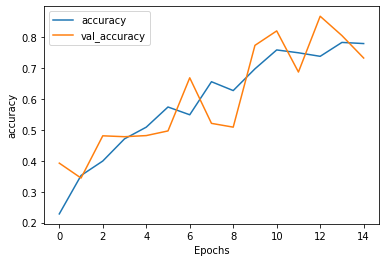

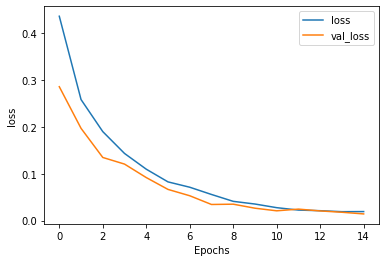

In [84]:
# Model 01
plot_graphs(history01, "accuracy")
plot_graphs(history01, "loss")

In [83]:
# save model 01
model01.save("model01.h5")

## Model 02

In [27]:
from tensorboard.plugins.hparams import api as hp

model02 = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features+1, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, activation='tanh')),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])

In [78]:
log_dir = 'logs/model02'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [30]:
model02.compile(loss='BinaryCrossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model02.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 6,459,044
Trainable params: 6,459,044
Non-trainable params: 0
______________________________________________

In [38]:
history02 = model02.fit(train, epochs=15, validation_data=val, verbose=1, callbacks=[callbacks, tensorboard_callback])

Epoch 1/15


306/306 [==============================] - 87s 270ms/step - loss: 0.4545 - accuracy: 0.2185 - val_loss: 0.3334 - val_accuracy: 0.3068
Epoch 2/15
306/306 [==============================] - 81s 266ms/step - loss: 0.2876 - accuracy: 0.3205 - val_loss: 0.2261 - val_accuracy: 0.3520
Epoch 3/15
306/306 [==============================] - 91s 299ms/step - loss: 0.2122 - accuracy: 0.3566 - val_loss: 0.1644 - val_accuracy: 0.3606
Epoch 4/15
306/306 [==============================] - 88s 287ms/step - loss: 0.1512 - accuracy: 0.4101 - val_loss: 0.1179 - val_accuracy: 0.4274
Epoch 5/15
306/306 [==============================] - 83s 271ms/step - loss: 0.1245 - accuracy: 0.4116 - val_loss: 0.1035 - val_accuracy: 0.4425
Epoch 6/15
306/306 [==============================] - 83s 273ms/step - loss: 0.0992 - accuracy: 0.4561 - val_loss: 0.0849 - val_accuracy: 0.4835
Epoch 7/15
306/306 [==============================] - 83s 273ms/step - loss: 0.0814 - accuracy: 0.4890 - val_loss: 0.0673 - val_accuracy: 0.4

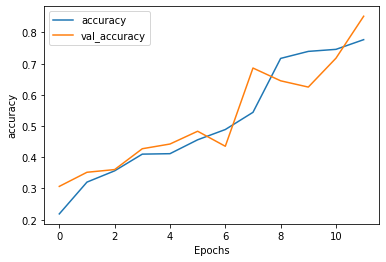

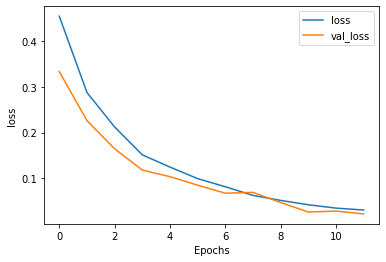

In [41]:
# Model 02
plot_graphs(history02, "accuracy")
plot_graphs(history02, "loss")

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/model02

In [42]:
# save model 02
model02.save("model02.h5")

# Visualize word embeddings

In [61]:
# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model02.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]
print(embedding_weights)

# Print the shape
print(embedding_weights.shape)


[[ 0.02574113  0.01443165  0.01660312 ...  0.06218081 -0.00425314
   0.00226651]
 [-0.04613372  0.01665169 -0.04066522 ...  0.0299336   0.00883261
   0.01826509]
 [ 0.04778152 -0.02277621  0.02369306 ... -0.00167465 -0.05848055
   0.01109151]
 ...
 [-0.04856825 -0.00548651 -0.00846354 ... -0.0020378   0.02178346
   0.02341704]
 [ 0.0179019  -0.04235506 -0.03988501 ...  0.01432958 -0.01571355
  -0.0092885 ]
 [ 0.03129959  0.0098909  -0.02641518 ... -0.00535293 -0.0486081
   0.0203056 ]]
(200001, 32)


In [62]:
import io

vectorizer.adapt(sentences.values)
vocabulary = vectorizer.get_vocabulary()

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, max_length):
    word_name = vocabulary[word_num]
    word_embedding = embedding_weights[word_num]

    out_m.write(word_name + "\n")
    out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

out_v.close()
out_m.close()

# Make predictions

## Using subset test

In [296]:
input_text = vectorizer("Dasar Kafir gak tau malu!")

In [297]:
batch = test.as_numpy_iterator().next()
batch

(array([[1529,  272,  322, ...,    0,    0,    0],
        [ 846,   12,    6, ...,    0,    0,    0],
        [ 490,  125,  116, ...,    0,    0,    0],
        ...,
        [ 463, 1206, 1194, ...,    0,    0,    0],
        [  10,   20,   12, ...,    0,    0,    0],
        [3209,    9,  439, ...,    0,    0,    0]], dtype=int64),
 array([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 1],
        [0, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]], dtype=int64))

In [298]:
batch_x, batch_y = test.as_numpy_iterator().next()

In [299]:
batch_x.shape

(16, 1800)

In [300]:
batch_y.shape

(16, 4)

In [301]:
(model02.predict(batch_x) > 0.8).astype(int)

1/1 [==============================] - 0s 152ms/step


array([[0, 1, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 0, 0, 0]])

In [302]:
train_data.columns[2:6]

Index(['pornografi', 'sara', 'radikalisme', 'pencemaran_nama_baik'], dtype='object')

In [303]:
model02.predict(np.expand_dims(input_text, 0))

1/1 [==============================] - 0s 155ms/step


array([[0.00313552, 0.73855436, 0.00160764, 0.29828256]], dtype=float32)

## Evaluate Model

In [27]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [28]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [329]:
for batch in test.as_numpy_iterator():
    x_true, y_true = batch
    yhat = model02.predict(x_true) > 0.8

    y_true = y_true.flatten()
    yhat = yhat.flatten()

    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 125ms/step


In [330]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.9872011542320251, Recall: 0.9717137813568115, Accuracy: 0.8538206219673157


## Using Gradio

In [28]:
model = tf.keras.models.load_model('model02.h5')

In [30]:
import gradio as gr

In [31]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(train_data.columns[2:6]):
        text += '{}: {}\n'.format(col, results[0][idx] > 0.8)
    
    return text

In [32]:
interface = gr.Interface(fn=score_comment, 
                        inputs=gr.Textbox(lines=2, placeholder="comment the score"),
                        outputs='text')

In [33]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://3d9f51e581c8fd2336.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 19s 19s/step
